<a href="https://colab.research.google.com/github/AleksanderVEriksen/My_Projects/blob/main/Jupyter%20Notebook%20/Machine%20learning/LSTM_RNN_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
diabetes = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv')

# Inspecting the diabetes datasets

In [4]:
print(diabetes.shape)
diabetes

(520, 17)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [5]:
# Check for NaN values
diabetes.isnull().values.any()

False

In [6]:
diabetes._get_numeric_data().columns

Index(['Age'], dtype='object')

In [7]:
diabetes.select_dtypes(include = ["object"]).columns

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [8]:
diabetes.index[:-1]

RangeIndex(start=0, stop=519, step=1)

In [9]:
diabetes['class'].unique()

array(['Positive', 'Negative'], dtype=object)

In [10]:
df_positive = diabetes[diabetes['class'] == 'Positive']
df_negative = diabetes[diabetes['class'] == 'Negative']

In [11]:
df_positive.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            485, 486, 487, 498, 500, 513, 514, 515, 516, 517],
           dtype='int64', length=320)

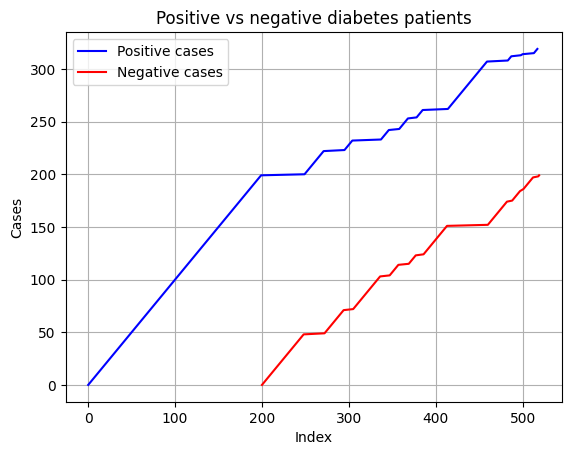

In [12]:
plt.plot(df_positive.index, np.arange(0, len(df_positive)), color = 'b', label = 'Positive cases')
plt.plot(df_negative.index, np.arange(0, len(df_negative)), color = 'r', label = 'Negative cases')
plt.grid('True')
plt.xlabel('Index')
plt.ylabel('Cases')
plt.title('Positive vs negative diabetes patients')
plt.legend(loc = 'best')
plt.show()

# Encode the dataset

In [13]:
from sklearn.preprocessing import OneHotEncoder
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [14]:
# Import label encoder 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for x in diabetes.select_dtypes(include = ["object"]).columns:
  diabetes[x]= label_encoder.fit_transform(diabetes[x])
diabetes

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


# Transform data from 2D tensor to 3D tensor

In [15]:
X0 = []
X1 = []
X2 = []
X3 = []
X4 = []
X5 = []
X6 = []
X7 = []
X8 = []
X9 = []
X10 = []
X11 = []
X12 = []
X13 = []
X14 = []
X15 = []
X16 = []
y = []

ts = 1

# Divide each feature in 20 timesteps
for i in range(0, diabetes.shape[0]-ts):
  X0.append(diabetes.iloc[i:i + ts,0])
  X1.append(diabetes.iloc[i:i + ts,1])
  X2.append(diabetes.iloc[i:i + ts,2])
  X3.append(diabetes.iloc[i:i + ts,3])
  X4.append(diabetes.iloc[i:i + ts,4])
  X5.append(diabetes.iloc[i:i + ts,5])
  X6.append(diabetes.iloc[i:i + ts,6])
  X7.append(diabetes.iloc[i:i + ts,7])
  X8.append(diabetes.iloc[i:i + ts,8])
  X9.append(diabetes.iloc[i:i + ts,9])
  X10.append(diabetes.iloc[i:i + ts,10])
  X11.append(diabetes.iloc[i:i + ts,11])
  X12.append(diabetes.iloc[i:i + ts,12])
  X13.append(diabetes.iloc[i:i + ts,13])
  X14.append(diabetes.iloc[i:i + ts,14])
  X15.append(diabetes.iloc[i:i + ts,15])

  y.append(diabetes.iloc[i + ts,16])


In [16]:
X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,y = np.array(X0), np.array(X1), np.array(X2), np.array(X3), np.array(X4), np.array(X5), np.array(X6), np.array(X7), np.array(X8), np.array(X9), np.array(X10), np.array(X11),np.array(X12),np.array(X13), np.array(X14), np.array(X15), np.array(y)

In [17]:
y = y.reshape(len(y),1)

In [18]:
y.shape
# source for the convertion: https://www.youtube.com/watch?v=Ng_uGKcWfIo

(519, 1)

In [19]:
X0[0][0]

40

# Preprocessing the data

In [20]:
diabetes

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X0 = scaler.fit_transform(X0)
X1 = scaler.fit_transform(X1)
X2 = scaler.fit_transform(X2)
X3 = scaler.fit_transform(X3)
X4 = scaler.fit_transform(X4)
X5 = scaler.fit_transform(X5)
X6 = scaler.fit_transform(X6)
X7 = scaler.fit_transform(X7)
X8 = scaler.fit_transform(X8)
X9 = scaler.fit_transform(X9)
X10 = scaler.fit_transform(X10)
X11 = scaler.fit_transform(X11)
X12 = scaler.fit_transform(X12)
X13 = scaler.fit_transform(X13)
X14 = scaler.fit_transform(X14)
X15 = scaler.fit_transform(X15)
y = scaler.fit_transform(y)

In [22]:
X = np.stack([X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15], axis=2)
X.shape, y.shape

((519, 1, 16), (519, 1))

# Train test split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, shuffle = 'False')

In [24]:
X_train.shape, y_train.shape

((347, 1, 16), (347, 1))

# Creating the models

In [25]:
def LSTM_Model(X,Y,bs,ep):
  model = keras.Sequential()
  model.add(keras.Input(shape=(X_train.shape[1], X_train.shape[2])))
  model.add(keras.layers.LSTM(128, return_sequences = True))
  model.add(keras.layers.LSTM(64, return_sequences = False))
  model.add(keras.layers.Dense(10))
  model.add(keras.layers.Dense(1))

  print(model.summary())

  loss = keras.losses.BinaryCrossentropy(from_logits = True)
  opt = keras.optimizers.Adam(learning_rate = 0.001)
  met = ['accuracy']

  model.compile(optimizer = opt, loss = loss, metrics = met)
  history = model.fit(x = X, 
            y=Y,
            batch_size=bs,
            epochs=ep,
            validation_split = 0.25
            )

  return model, history


def RNN_Model(X,Y,bs,ep):
  model = keras.Sequential()
  model.add(keras.Input(shape=(X_train.shape[1], X_train.shape[2])))
  model.add(keras.layers.SimpleRNN(128, return_sequences = True))
  model.add(keras.layers.SimpleRNN(64, return_sequences = False))
  model.add(keras.layers.Dense(10))
  model.add(keras.layers.Dense(1))

  print(model.summary())

  loss = keras.losses.BinaryCrossentropy(from_logits = True)
  opt = keras.optimizers.Adam(learning_rate = 0.001)
  met = ['accuracy']

  model.compile(optimizer = opt, loss = loss, metrics = met)
  history = model.fit(x = X, 
            y=Y,
            batch_size=bs,
            epochs=ep,
            validation_split = 0.25
            )

  return model, history

# Training variables

In [26]:
# Training variables
batch_size = 16 
epochs = 500

# Training the models

In [27]:
# LSTM model
model_lstm = LSTM_Model(X_train, y_train, batch_size, epochs)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            74240     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 124,309
Trainable params: 124,309
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
17/17 [==============================] - 6s 70ms/step - loss: 0.6764 - accuracy: 0.4038 - val_loss: 0.6339 - val_accuracy: 0.3908
Epoch 2/500
17/17 [================

In [28]:
# RNN model
model_rnn = RNN_Model(X_train, y_train, batch_size, epochs)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 128)            18560     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31,573
Trainable params: 31,573
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
17/17 [==============================] - 3s 29ms/step - loss: 0.5249 - accuracy: 0.7192 - val_loss: 0.3607 - val_accuracy: 0.8161
Epoch 2/500
17/17 [================

In [29]:
lstm_acc = model_lstm[1].history['accuracy']
lstm_val_acc = model_lstm[1].history['val_accuracy']
lstm_loss = model_lstm[1].history['loss']

rnn_acc = model_rnn[1].history['accuracy']
rnn_val_acc = model_lstm[1].history['val_accuracy']
rnn_loss = model_rnn[1].history['loss']

# Saving the models

In [30]:
# Saves the models
#model_lstm[0].save('/content/drive/MyDrive/Machine_learning/LSTM_RNN/Diabetes_LSTM')
#model_rnn[0].save('/content/drive/MyDrive/Machine_learning/LSTM_RNN/Diabetes_RNN')

#Load the models

In [31]:
# Loads the model
lstm_model = keras.models.load_model("/content/drive/MyDrive/Machine_learning/LSTM_RNN/Diabetes_LSTM")
rnn_model = keras.models.load_model("/content/drive/MyDrive/Machine_learning/LSTM_RNN/Diabetes_RNN")

# Evaluation of models

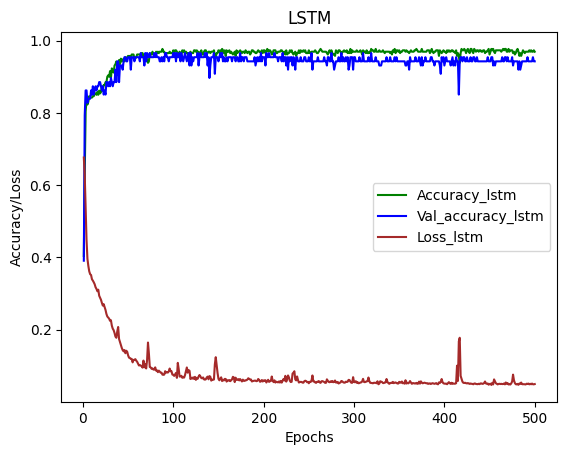

In [32]:
import matplotlib.pyplot as plt

epochs = range(1, len(lstm_acc) + 1)

plt.plot(epochs, lstm_acc, color = 'g', label = 'Accuracy_lstm')
plt.plot(epochs, lstm_val_acc, color = 'b', label = 'Val_accuracy_lstm')
plt.plot(epochs, lstm_loss, color = 'brown' , label = 'Loss_lstm')
plt.title('LSTM')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend(loc = 'best')
plt.show()

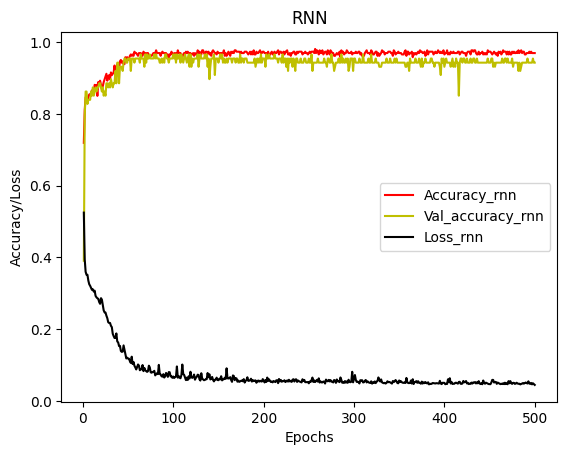

In [33]:
plt.plot(epochs, rnn_acc, color = 'r', label = 'Accuracy_rnn')
plt.plot(epochs, rnn_val_acc, color = 'y', label = 'Val_accuracy_rnn')
plt.plot(epochs, rnn_loss, color = 'black' , label = 'Loss_rnn')
plt.title('RNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend(loc = 'best')
plt.show()

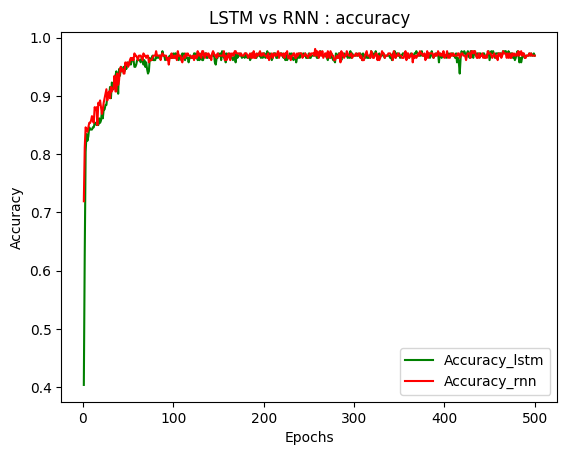

In [34]:
plt.plot(epochs, lstm_acc, color = 'g', label = 'Accuracy_lstm')
plt.plot(epochs, rnn_acc, color = 'r', label = 'Accuracy_rnn')
plt.title('LSTM vs RNN : accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

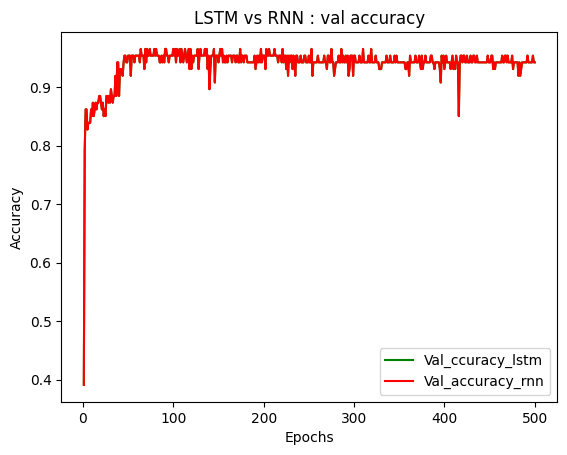

In [35]:
plt.plot(epochs, lstm_val_acc, color = 'g', label = 'Val_ccuracy_lstm')
plt.plot(epochs, rnn_val_acc, color = 'r', label = 'Val_accuracy_rnn')
plt.title('LSTM vs RNN : val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

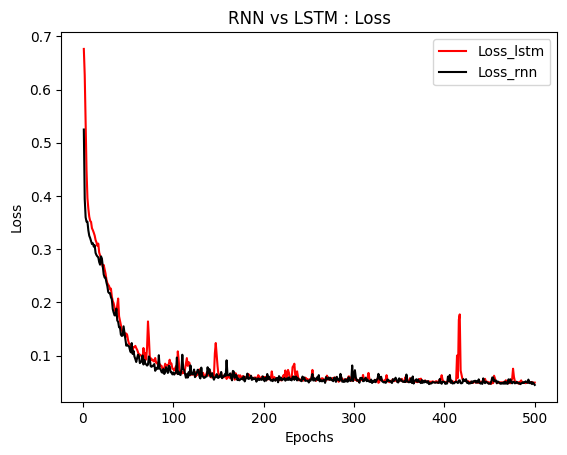

In [36]:
plt.plot(epochs, lstm_loss, color = 'red' , label = 'Loss_lstm')
plt.plot(epochs, rnn_loss, color = 'black' , label = 'Loss_rnn')
plt.title('RNN vs LSTM : Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

In [37]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

lstm_model.evaluate(X_test, y_test)
rnn_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 5ms/step - loss: 0.1072 - accuracy: 0.9651


[0.10717609524726868, 0.9651162624359131]

In [38]:
pred_y_lstm = lstm_model.predict(X_test)
pred_y_rnn = rnn_model.predict(X_test)

pred_y_lstm_class = np.where(pred_y_lstm > 0.5, 1,0)
pred_y_rnn_class = np.where(pred_y_rnn > 0.5, 1,0)

6/6 [==============================] - 0s 3ms/step


In [39]:
from sklearn.metrics import mean_squared_error

testScore = np.sqrt(mean_squared_error(y_test, pred_y_lstm_class[:,0]))
print('LSTM: Test Score: %.2f RMSE' % (testScore))

testScore = np.sqrt(mean_squared_error(y_test, pred_y_rnn_class[:,0]))
print('RNN: Test Score: %.2f RMSE' % (testScore))

LSTM: Test Score: 0.25 RMSE
RNN: Test Score: 0.19 RMSE


In [40]:
X_test.shape, pred_y_lstm_class.shape

((172, 1, 16), (172, 1))

In [41]:
from sklearn.metrics import classification_report

target_names = ['Diabetes', 'Not diabetes']
print('---------------------LSTM----------------------------')
print(classification_report(y_test,pred_y_lstm_class, target_names=target_names))
print('---------------------RNN-----------------------------')
print(classification_report(y_test,pred_y_rnn_class, target_names=target_names))

---------------------LSTM----------------------------
              precision    recall  f1-score   support

    Diabetes       0.88      0.95      0.92        63
Not diabetes       0.97      0.93      0.95       109

    accuracy                           0.94       172
   macro avg       0.93      0.94      0.93       172
weighted avg       0.94      0.94      0.94       172

---------------------RNN-----------------------------
              precision    recall  f1-score   support

    Diabetes       0.97      0.94      0.95        63
Not diabetes       0.96      0.98      0.97       109

    accuracy                           0.97       172
   macro avg       0.97      0.96      0.96       172
weighted avg       0.97      0.97      0.96       172



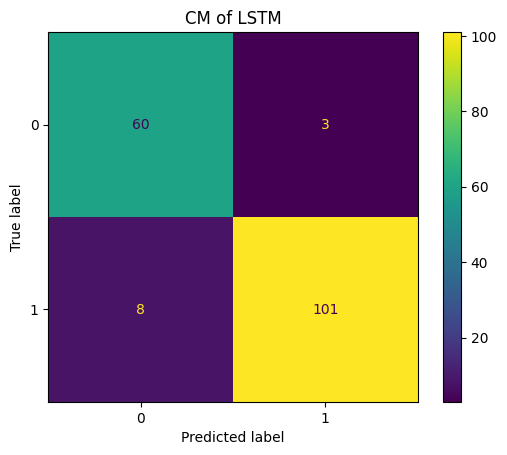

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, pred_y_lstm_class)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title('CM of LSTM')
plt.show()

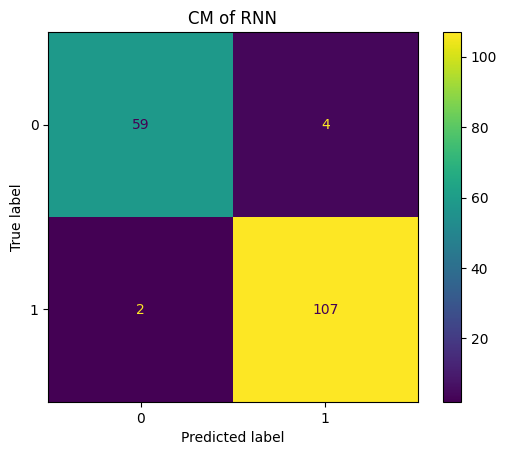

In [43]:
cm = confusion_matrix(y_test, pred_y_rnn_class)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title('CM of RNN')
plt.show()

In [44]:
from sklearn.metrics import accuracy_score

lstm_Acc = accuracy_score(y_test, pred_y_lstm_class)
rnn_Acc = accuracy_score(y_test, pred_y_rnn_class)

print('LSTM acc: ', lstm_Acc)
print('RNN acc: ', rnn_Acc)

LSTM acc:  0.936046511627907
RNN acc:  0.9651162790697675


In [45]:
pred_y_lstm_class[0], pred_y_rnn_class[0], y[0]

(array([1]), array([1]), array([1.]))

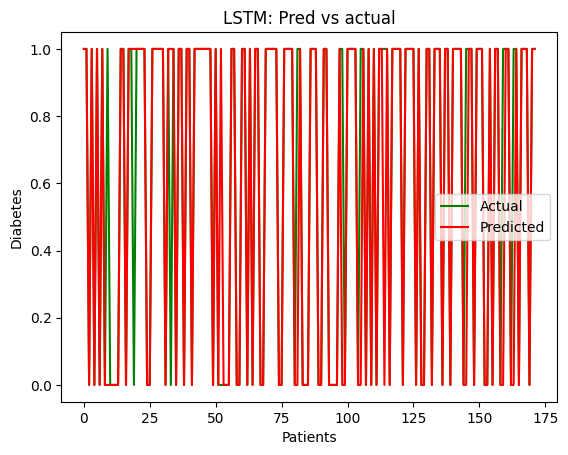

In [55]:
Xpoints = np.arange(0, len(X_test))

plt.plot(Xpoints, y_test, color = 'g', label = 'Actual')
plt.plot(Xpoints, pred_y_lstm_class, color = 'r', label = 'Predicted')
plt.title('LSTM: Pred vs actual')
plt.xlabel('Patients')
plt.ylabel('Diabetes')
plt.legend(loc = 'best')
plt.show()

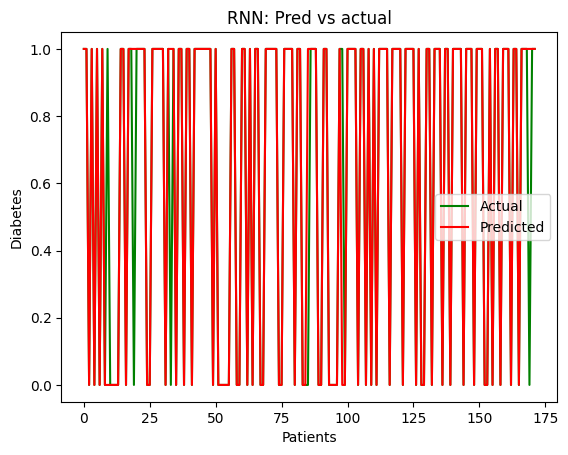

In [56]:
plt.plot(Xpoints, y_test, color = 'g', label = 'Actual')
plt.plot(Xpoints, pred_y_rnn_class, color = 'r', label = 'Predicted')
plt.title('RNN: Pred vs actual')
plt.xlabel('Patients')
plt.ylabel('Diabetes')
plt.legend(loc = 'best')
plt.show()

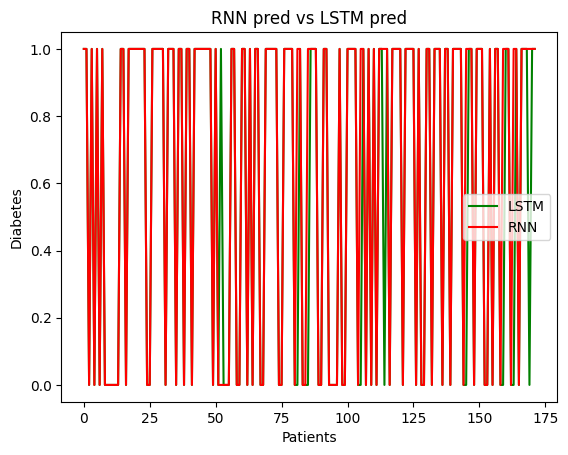

In [58]:
plt.plot(Xpoints, pred_y_lstm_class, color = 'g', label = 'LSTM')
plt.plot(Xpoints, pred_y_rnn_class, color = 'r', label = 'RNN')
plt.title('RNN pred vs LSTM pred')
plt.xlabel('Patients')
plt.ylabel('Diabetes')
plt.legend(loc = 'best')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

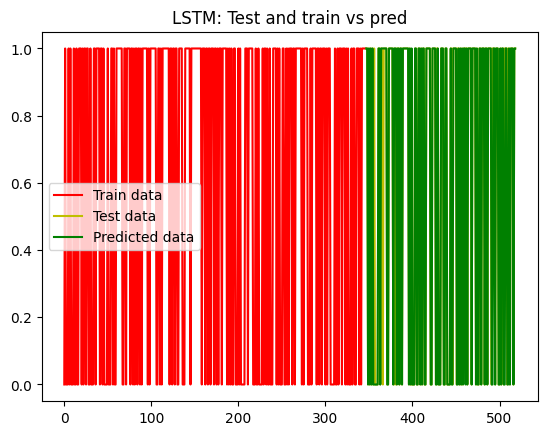

In [60]:
plt.plot(np.arange(0,len(X_train)), y_train, color = 'r', label = 'Train data')
plt.plot(np.arange(len(X_train),len(X_train)+len(X_test)), y_test, color = 'y', label = 'Test data')
plt.plot(np.arange(len(X_train), len(X_train)+len(X_test)), pred_y_lstm_class, color = 'g',label = 'Predicted data')
plt.title('LSTM: Test and train vs pred')
plt.legend(loc='best')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

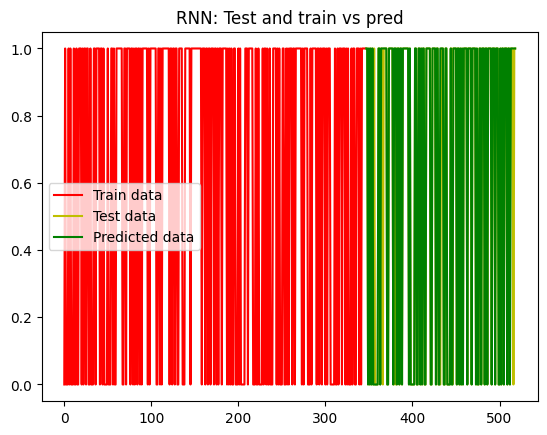

In [59]:
plt.plot(np.arange(0,len(X_train)), y_train, color = 'r', label = 'Train data')
plt.plot(np.arange(len(X_train),len(X_train)+len(X_test)), y_test, color = 'y', label = 'Test data')
plt.plot(np.arange(len(X_train), len(X_train)+len(X_test)), pred_y_rnn_class, color = 'g' ,label = 'Predicted data')
plt.title('RNN: Test and train vs pred')
plt.legend(loc='best')
plt.show